## <font size=6> The Polar Express:</font>
## Investigating aerosol transport by Atmospheric Rivers and the impact on polar precipitation and clouds</font>
<br><br>
<font size=4>
**Julia Asplund** (julia.asplund@aces.su.se), in collaboration with Lea Haberstock  <br>
This study is a part of the project **polARosol- For a brighter future?**: POLar Atmospheric Rivers and how they are influenced by AeROSOLs and how that might affect cloud BRIGHTness but mostly other parameters now and in the FUTURE <p>
November 21st, 2022<p>
eScience Tools in Climate Science: Linking Observations with Modelling <p>
Project assistant, fearless leader, person we would not have managed without: Remy Lapere 
</font>

## Abstract
This is a work in progress, but main points will be: <br>
- AR key moisture and heat transport 
- This work highlight of AR detection complexity, and this scheme needs further work etc
- Preliminary, we see the strongest impact of in arctic during winter, primarily on surface temperature and longwave (higher with pollution)
- Much less of a seasonal trend in Antarctic, both in terms of the impact on investigated parameters, and in terms of number of AR, polluted fraction, etc.

## Introduction

Atmospheric rivers (AR) are long, narrow regions of significantly enhanced poleward moisture transport in the atmosphere. They mostly occur by interactions between large scale atmospheric circulation processes like the hadley cell or low level jets, and are by far the dominant process for poleward transport of moisture from the tropics to the midlatitudes. AR are therefore crucial for precipitation and water security in populated regions. However, they also result in destructive precipation events, causing floods or landslides (Nash et al., 2018, Payne et al., 2020). In the polar regions, AR are relatively rare events since they transport heat along with the moisture and can trigger extreme precipitation events, they still play a significant role in driving sea ice melt, ice sheet calving and changes in precipitation patterns (Nash et al., 2018, Wille et al., 2019). There are still very few studies on AR and their impact polar climate, even though the interest is increasing with the urgency of understanding major climate feedbacks and tipping points for societal resilience against climate change. 

The melting of the Greenland Ice Sheet has been shown to be largely driven by a combination of warm air and moisture transport by AR, particularly in summer, and the presence of thin clouds that trap longwave radiation, heating the surface (Neff, 2018). One of the factors affecting the radiative properties of Arctic clouds is aerosols, as aerosol particles acting as cloud condensation nuclei (CCN) are necessary to form cloud droplets. In both polar regions, aerosol particle concentrations are typically several orders of magnitude lower than at mid latitues, which means there is a low supply of CCN. Increasing concentrations can therefore impact droplet number concentrations and the downwelling longwave radiation of clouds significantly (Mauritsen et al, 2011). During the MOSAiC expedition in 2020, extreme values of aerosol particle concentrations for the Arctic were observed during a warm air intruision event (Dada et al., 2022), which also led to a significant increase in the CCN concentration. The definition of warm air intruisions is more broad than for AR as it does not limit the shape or moisture content of the air mass, and would in practice most AR that reach the Arctic. In the Antarctic, there are several studies on AR impacts on ice shelf calving due to precipitation effects (e.g Wille et al., 2019, 2021, and 2022), but no discussion on the role of aerosol particle transport. This is likely because the Antarctic continent is surrounded by ocean and thus there are barely any large sources of pollution that could by transported poleward by AR. Nevertheless, in this study both poles are included for comparison and completeness.

This aim of this work is to investigate aerosol particle transport to the poles by AR. To what degree AR are polluted with particles when they reach the poles? Is the impact of the river on clouds, precipitation and surface temperature different between clean and polluted AR, as we would expect. Is this relation the same at both poles? To answer these questions, the output from NorESM2-LM historical experiment for the sixth Coupled Model Intercomparison Project (CMIP6) is used, in combination with an AR detection algorithm. 

This study is a part of the project polARosol, which also includes a study by Lea Haberstock with the aim to investigate how AR properties and frequency will change in the future. The same model experiment is used in both studies for consistency, which is a limitation for this work in terms of the available data variables and model resolution, but allows for further conclusions to be drawn when combining the results presented here with Lea's work.

## Methods

### Data description and preprocessing

There is one key preprocessing step of this analysis, which is the AR detection. The detection script is written by Remy Lapere, following the AR definition and detection principle developed by Wille et al (2021). This principle is to detect AR by identifying regions of adjacent gridboxes that have high poleward integrated vapour transport (IVT) between certain pressure levels. IVT is given by 

IVT $=-\frac{1}{g}  \int_{900 \textrm{ hPa} }^{300 \textrm{ hPa}} q \textbf{V} \mathit{dp} $

where g is the standard gravity, q is the specific humidity and $\textbf{V}$ is the meridional wind component. Only the positive (poleward) wind is considered. In the original algorithm by Wille et al (2021), the IVT is calculated in each gridbox for a reference period, and the threshold for "high" IVT is set to the 98th percentile in each gridbox, calculated separately for each month. Then for the detection, clusters of gridboxes with an IVT above the threshold and that reach at least 20$^{\cdot}$ latitude in size are considered to be AR, at each timestamp. Important to note is that this algorithm was developed for reanalysis data with 3 hourly output. In the this project we wanted to be able to look at projections of future trends in AR (see Lea's report), and therefore we use model data, more specifically the NorESM2-LM output for the historical CMIP6 experiment (Lea also uses scenarioMIP for future trends). The highest temporal resolution avalaible is daily average output. So, the fluctuations in IVT in our data are dampened compared to what was used by Wille et al (2021), and what we can detect is only the daily averaged AR. Therefore, in the detection script used for this report the IVT threshold was set to the 94th percentile of each gridbox. This threshold was chosen by tuning the detection based on a comparison with a one-year AR detection product from Jonathan Wille, see the [Supplementary material](#Supplementary-material) for details. However, in our detection scheme the threshold is not calculated separately for each month, but for the entire reference period which is 2000-2015. In the algorithm by Wille, the IVT and therefore also AR beyond latitude +/- 80 degrees are discarded, we have not made this cut. I want to emphasize that the AR detection used for this report is in many ways far from perfect, not only because of the low temporal and spatial resolution of the data, and the blunt threshold,  but also because there simply is no deifined objective detection method of AR, and results should be interpreted with this in mind.

In this report the period 1990-2015 is selected from the historical CMIP6 run. The AR detection script cannot be run in the conda environment set up for this course so I have run it locally, and therefore the pre-processed files [historical_1990-2000_combined_q94.nc](historical_1990-2000_combined_q94.nc) and [historical_2000-2015_combined_q94.nc](historical_2000-2015_combined_q94.nc) are provided (they are split in 2 simply to not run into issues with file size, I combine them below). These make an AR mask, where the parameter `ivt` is 1 for every gridbox part of an atmospheric river at a given timestamp, and 0 otherwise. They were obtained with the script [opencv_detection_OK.py](opencv_detection_OK.py) (by Remy Lapere), also provided. 

The choice variables used for classification of polluted vs clean AR, as well as for the analysis on the impact, is limited by what variables that are available with daily time resolution. Therefore, the aerosol optical depth (AOD) at 550 nm will be used to sort the AR, further described in the section [AR masking and pollution threshold](AR-masking-and-pollution-threshold).

### Loading data 

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import s3fs
import intake
import functions_JA as fun
#import os
import warnings
#from matplotlib import rc,animation
#from matplotlib.animation import FuncAnimation
#from IPython import display
#import cartopy as cy
import cartopy.crs as ccrs

In [75]:
from importlib import reload
reload(fun)
#Years considered, corresponding to AR mask
start_year=1990
end_year=2015

Loading AR mask, pre calculated as described:

In [17]:
#loading both mask files into one dataset
ar_mask = xr.open_mfdataset('historical_*_combined_q94.nc')

Fetching AOD data from met.no:

In [25]:
#Define connection to met.no bucket
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", 
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))

#path to aod data file, in Ada's folder
s3path_aod = 's3://escience2022/Ada/monthly/od550aer_AERday_NorESM2-LM_historical_r1i1p1f1_gn_19500101-20141231.nc'

#Importing file and dropping unused parameters
aod_ds = xr.open_dataset(s3.open(s3path_aod), drop_variables =['time_bnds','lat_bnds','lon_bnds'])
#Selecting the right time period
aod_ds = aod_ds.sel(time = slice(str(start_year)+"-01-01", str(end_year-1)+"-12-31") )

In this AOD file, the timestamp is at midnight every day while the AR mask has timestamps at noon, even though it is the same model run with daily average output. Therefore I replace the AOD time with the time-array from the AR mask, as this will simplify the masking:

In [27]:
aod_ds['time'] = ar_mask.time

Loading variables to be considered, from pangeo:

In [28]:
#Define url and connection
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

#Search database for the right model, experiment and variables. Save catalog as dictionary, and finally as xarray dataset
cat = col.search(source_id=['NorESM2-LM'], experiment_id=['historical'], table_id=['day'], variable_id=['clt','pr','tas','rlds'], member_id=['r1i1p1f1'])
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})
dataset_list = list(dset_dict.keys())
dset = dset_dict[dataset_list[0]]
vars_ds = dset.sel(member_id='r1i1p1f1',time=slice(str(start_year)+"-01-01", str(end_year-1)+"-12-31"))


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


### AR masking and pollution threshold

Since I want to investigate the properties of clean versus polluted AR, I now need to sort the detected AR depending pollution level. As previously mentioned, aerosol particle concentrations at the poles are generally very low, so low that air transported from mid latitudes will almost always be polluted in comparison. This means that setting the pollution thresholds based on high and low polar concentrations would classify >95% of AR as polluted (yes, I tried), making it difficult to study differences between pollution levels. Therefore, I define the thresholds for clean and polluted AR based on the AOD at mid latitudes. AR that reach the Arctic (above 60$^{\cdot}$ North) are considered polluted if the average AOD in the river is above the 95th percentile of AOD for the whole time period at latitudes between 30$^{\cdot}$ and 60$^{\cdot}$ North. Arctic AR with an average AOD below the 25th percentile are considered clean. Antarctic AR are sorted depending on the AOD between 30$^{\cdot}$ and 60$^{\cdot}$ South, with a pollution threshold of the average AOD and clean rivers below the 10th percentile. The lower thresholds for the Antarctic were tuned in order to obtain a significant fraction of polluted AR.

In [29]:
#Creating a dictionary to store the pollution limits for the sorting of ARs 
aod_lim= {}
aod_lim['midlat_75th'] = aod_ds.sel(lat = slice(30,60)).od550aer.quantile(0.75,skipna=True)
aod_lim['midlat_25th'] = aod_ds.sel(lat = slice(30,60)).od550aer.quantile(0.25,skipna=True)
aod_lim['midlowlat_75th'] = aod_ds.sel(lat = slice(-60,-30)).od550aer.quantile(0.75,skipna=True)
aod_lim['midlowlat_25th'] = aod_ds.sel(lat = slice(-60,-30)).od550aer.quantile(0.25,skipna=True)

In [79]:
aod_lim['midlat_mean'] = aod_ds.sel(lat = slice(30,60)).od550aer.mean(skipna=True)
aod_lim['midlowlat_mean'] = aod_ds.sel(lat = slice(-60,-30)).od550aer.mean(skipna=True)
aod_lim['midlowlat_10th'] = aod_ds.sel(lat = slice(-60,-30)).od550aer.quantile(0.1,skipna=True)

Now I can apply the AR mask to the AOD data and sort the rivers. The function `sort_ar_by_aod` takes the AOD dataset, the AR mask and the pollution limits, loops over every timestep, applies the mask and then checks the average AOD of every river to sort it. Returned is an AOD dataset with all gridboxes outside the rivers masked out, separated into polluted, clean, and intermediate pollution levels. These parameters can be used as an AR mask for each pollution category separately. There is also a count of the number of rivers in each category for every timestep.

In [80]:
arc_aod_ar = fun.sort_ar_by_aod(aod_ds.sel(lat=slice(60,90)), ar_mask.sel(lat=slice(60,90)), aod_lim['midlat_mean'], aod_lim['midlat_25th'])
ant_aod_ar = fun.sort_ar_by_aod(aod_ds.sel(lat=slice(-90,-60)), ar_mask.sel(lat=slice(-90,-60)), aod_lim['midlowlat_mean'],
                                aod_lim['midlowlat_10th'])

Next I have to apply the AR masks to the dataset containing the variables of interest. The masked datasets are stored in two different dictionaries, one for each pole. In order to plot histograms of the variables they need to be in 1-dimensional arrays, with all NAN-values (from the masked out data) removed. These are also stored in the dictionaries, to simplify plotting.

In [81]:
#Create empty dictionaries to fill with variables and define variables and pollution levels considered:
arc_plotting_vars = {}
ant_plotting_vars = {}
flat_vars = ['clt','pr','tas','rlds']
levs = ['clean','mid','poll']


for lev in levs:
    #Create a dictionary in each pollution level
    arc_lev_dict = {}
    ant_lev_dict = {}
    
    #Mask the dataset with the AR mask for current pollution level, separate for both ploes and store in dictionary created above.
    arc_lev_dict['ar_masked'] = vars_ds.sel(lat=slice(60,90)).where(arc_aod_ar[f'{lev}_ar_aod'].notnull() )
    ant_lev_dict['ar_masked'] = vars_ds.sel(lat=slice(-90,-60)).where(ant_aod_ar[f'{lev}_ar_aod'].notnull() )
    
    for var in flat_vars:    
        #For current variable, flatten the masked array and remove NaN values
        arc_lev_dict[f'{var}_flat']= arc_lev_dict['ar_masked'][var].values.flatten()[~np.isnan(arc_lev_dict['ar_masked'][var].values.flatten())]
        ant_lev_dict[f'{var}_flat']= ant_lev_dict['ar_masked'][var].values.flatten()[~np.isnan(ant_lev_dict['ar_masked'][var].values.flatten())]
        
        if var == 'pr':
            #Convert precipiation from kg/m^2/s to mm/day
            arc_lev_dict[f'{var}_flat']= arc_lev_dict[f'{var}_flat']*86400
            ant_lev_dict[f'{var}_flat']= ant_lev_dict[f'{var}_flat']*86400
    
    #save dictionary of data in current pollution level
    arc_plotting_vars[lev]=arc_lev_dict
    ant_plotting_vars[lev]=ant_lev_dict
    

## Results and discussion

To visually demonstrate the AR detection, below the AR mask is plotted for one timestamp for each pole featuring a detected AR in blue. 

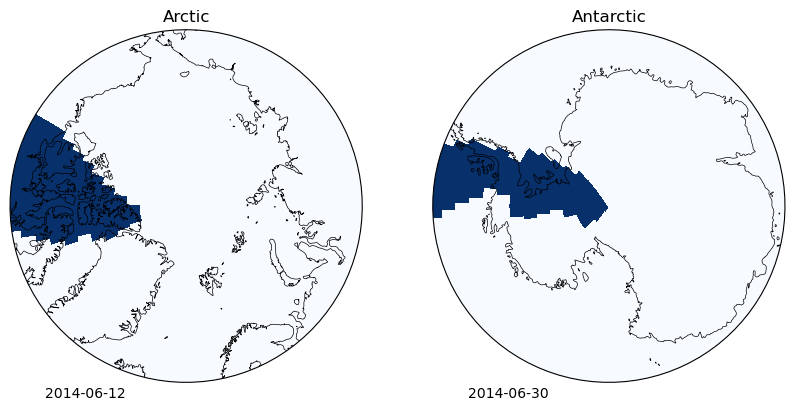

In [53]:
#Selecting one timestamp and just each respective pole from the AR mask dataset:
arc_ex_ar = ar_mask.sel(time = '2014-06-12', lat =slice(65,90))
ant_ex_ar = ar_mask.sel(time = '2014-06-30', lat =slice(-90,-65))

#putting in dictionaries to simplify simultaneous plotting
plot_ex_ar= {'Arctic' :arc_ex_ar, 'Antarctic' : ant_ex_ar}

#MAking figure, adding the two subplots and setting their extent separately as they have different projections:
fig = plt.figure(figsize = (10,5), dpi=100)

arc_ax = fig.add_subplot(121, projection=ccrs.NorthPolarStereo())
ant_ax = fig.add_subplot(122, projection=ccrs.SouthPolarStereo())

arc_ax.set_extent([0, 360, 65, 90], ccrs.PlateCarree())
ant_ax.set_extent([0, 360, -65, -90], ccrs.PlateCarree() )             

axs=[arc_ax,ant_ax]
#looping over the keys in the dictionary and plotting each dataset in the respective axis:
for i, pole in enumerate(plot_ex_ar.keys()):
    axs[i].coastlines(linewidth=0.5)
    fun.circle_for_polar_map(axs[i]) #Just a function so that the extent is cut out as a circle rather than a square
    axs[i].set_title(pole)
    axs[i].pcolormesh(plot_ex_ar[pole].lon, plot_ex_ar[pole].lat, plot_ex_ar[pole].ivt.squeeze(), cmap='Blues', vmin=0,vmax=1,
                      transform=ccrs.PlateCarree() )
    #adding the text showing the timestamp:
    fig.text(0.1,-0.05,plot_ex_ar[pole].time.values.astype('datetime64[D]')[0],horizontalalignment='left',
     verticalalignment='bottom', transform=axs[i].transAxes)

plt.show()

This figure demonstrates two main issues with the current detection scheme, that some rivers are too wide (left), and that many reach the center of the pole (right). The latter is an issue becuase since only the meridional wind component is considered, detected AR can by definition not cross the pole. In reality, it is also very rare that they actually reach this far, a few times per year at most. Wille et al (2020) deal with this problem by not considering latitudes beyond 80$^{\cdot}$ North or South. We did not make this cut as we wanted to include events such as the one observed during MOSAiC (Dada et al, 2022), where the warm moist air mass almost reached the North pole. However, this results in the artifact that the AR converge and end at the pole. On the other hand, a cut at 80$^{\cdot}$ creates the artefact that AR end there. In this study the polar AR singularity illusion is most likely not the biggest uncertainty and we have not made any attempts at finding a way to avoid it. But in a larger context, it highlights a flaw in the original algorithm by Wille et al, and raises philosophical questions about the very definition of AR. If they are defined by poleward moisture transport, then they can actually theoretically never cross the poles. But in practice, long moist air corridors probably don't care about this definition and sweep over the poles if they desire. Again this would be a quite rare event and not the most important aspect of AR to consider, but it is something to keep in mind when defining future detection schemes or attempting to model AR.

The issue of the detected rivers being too wide is more alarming. It is also related to the issue of the pole, as it is an indication that the detection scheme is not strict enough and classifies too large regions as AR. There is no strict threshold of the accepted width of AR, but they are defined as narrow and I think the river in the left plot does not objectively fit that description. One potential method to reduce the size of detected AR would be to increase the IVT threshold, currently at the 94th percentile. The reason for keeping it this low is because even at this threshold, the number of detected rivers is seemingly too low (see the [Supplementary material](#Supplementary-material)), which probably has to do with the low time resolution of the input data. Instead, I think the AR size could be improved by separating the IVT values monthly, like in the algorithm by Wille et al (2021) (this was not done from the beginning because it was initially overlooked and once discovered, not trivial to implement). IVT is likely to vary between seasons as the specific humidity depends on temperature. So, the IVT threshold may be unproportionally high during winter when the air is dryer, leading to very few AR detections, with the opposite effect during summer. To look at how the number of detected AR varies seasonally, the total number of detected rivers in each month during the whole time period, separated by pollution category, is plotted below.

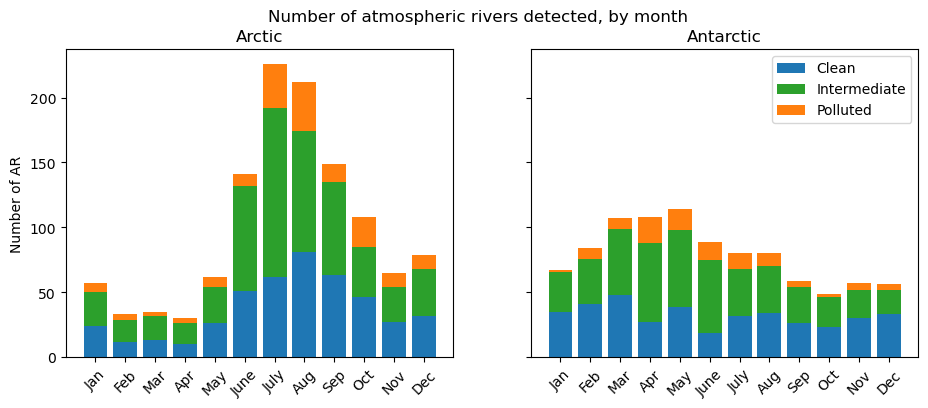

In [83]:
labels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']

#Grouping the polar AR AOD datasets by month and summing over the whole period
arc_monthly_count = arc_aod_ar.groupby('time.month').sum(dim='time')
ant_monthly_count = ant_aod_ar.groupby('time.month').sum(dim='time')

#defining a function that plots all three pollution levels in the given grouped dataset on a given axis, just to avoid writing the code twice
def plot_count_bar(ax ,labels, grouped_ds, title=''):
    ax.bar(labels, grouped_ds.clean_ar_counts.values, label='Clean')
    ax.bar(labels, grouped_ds.mid_ar_counts.values, bottom = grouped_ds.clean_ar_counts.values, color='tab:green', label='Intermediate')
    ax.bar(labels, grouped_ds.poll_ar_counts.values, bottom = grouped_ds.clean_ar_counts.values+grouped_ds.mid_ar_counts.values,
        color='tab:orange', label='Polluted')
    ax.set_xticklabels(labels, rotation=45)
    ax.set_title(title)

#PLotting for both poles
fig, axs = plt.subplots(1,2, figsize=(11,4),dpi=100, sharey=True)
plot_count_bar(axs[0], labels, arc_monthly_count, 'Arctic')
plot_count_bar(axs[1], labels, ant_monthly_count, 'Antarctic')
axs[0].set_ylabel('Number of AR')
fig.suptitle('Number of atmospheric rivers detected, by month')
plt.legend()
plt.show()

This plot shows a big difference in AR trends between the poles. The left panel clearly shows that in the Arctic, AR are much more common in the summer than in the winter. This is in line with what I discussed above, and could therefore be due to the fact that the IVT threshold applied is not adjusted monthly. However, the same trend is not seen at all in the right panel, for the Antarctic. In fact, AR seem to be the least frequent during the southern hemispheric summer, with the peak in the fall. Overall the seasonal trend is also much less pronounced, and the number of AR more constant throughout the year. This could be an indication that the annual cycle detected in the Arctic is real and not an artifact due to the IVT threshold. But it could also just mean that the IVT has a less pronounced annual cycle in the Antarctic, and the AR detection is therefore less sensitive to the seasonality of the IVT threshold. Or, the trend in IVT has less to do with temperature and more to do with large scale atmospheric processes like the Antarctic and Arctic Oscillation. 

Is it a thing that arctic oscillates "more" so then that could explain seasonality?

Difference between poles due to differences in the stability of jetstreams, or amoc etc?

Plot seasonal Arctic:

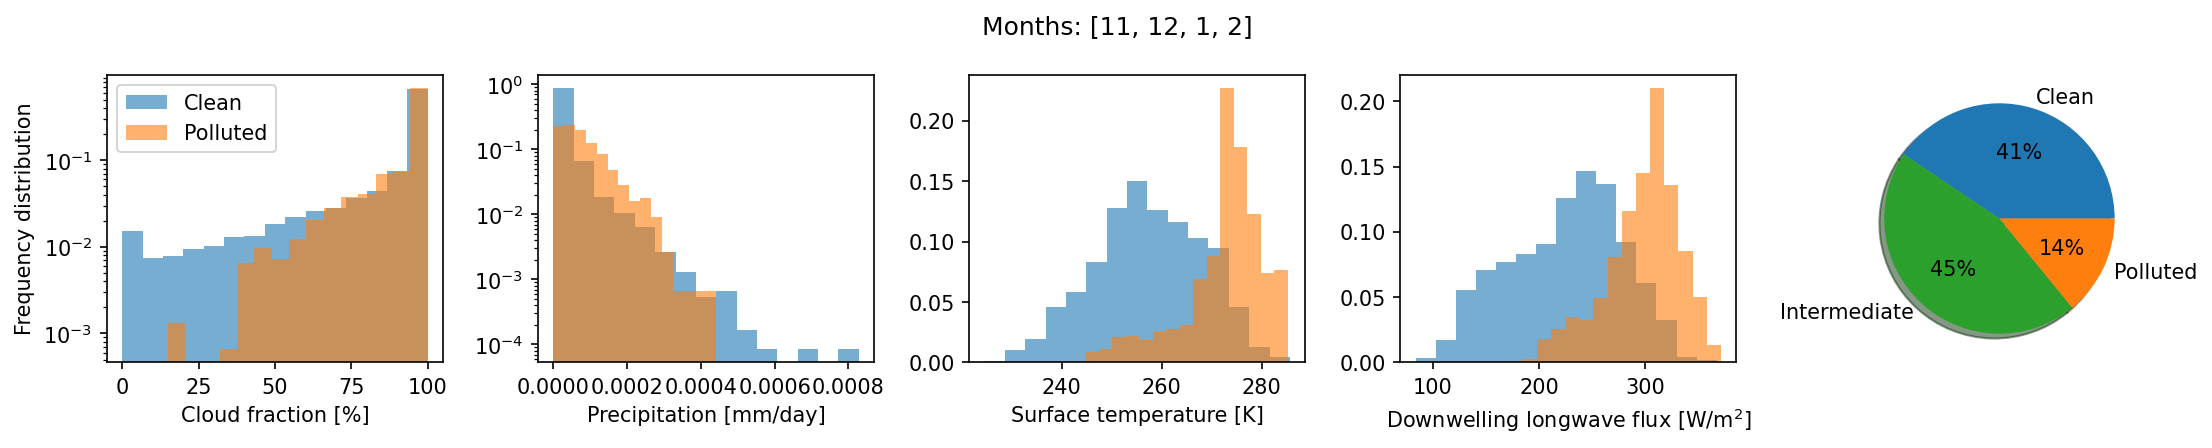

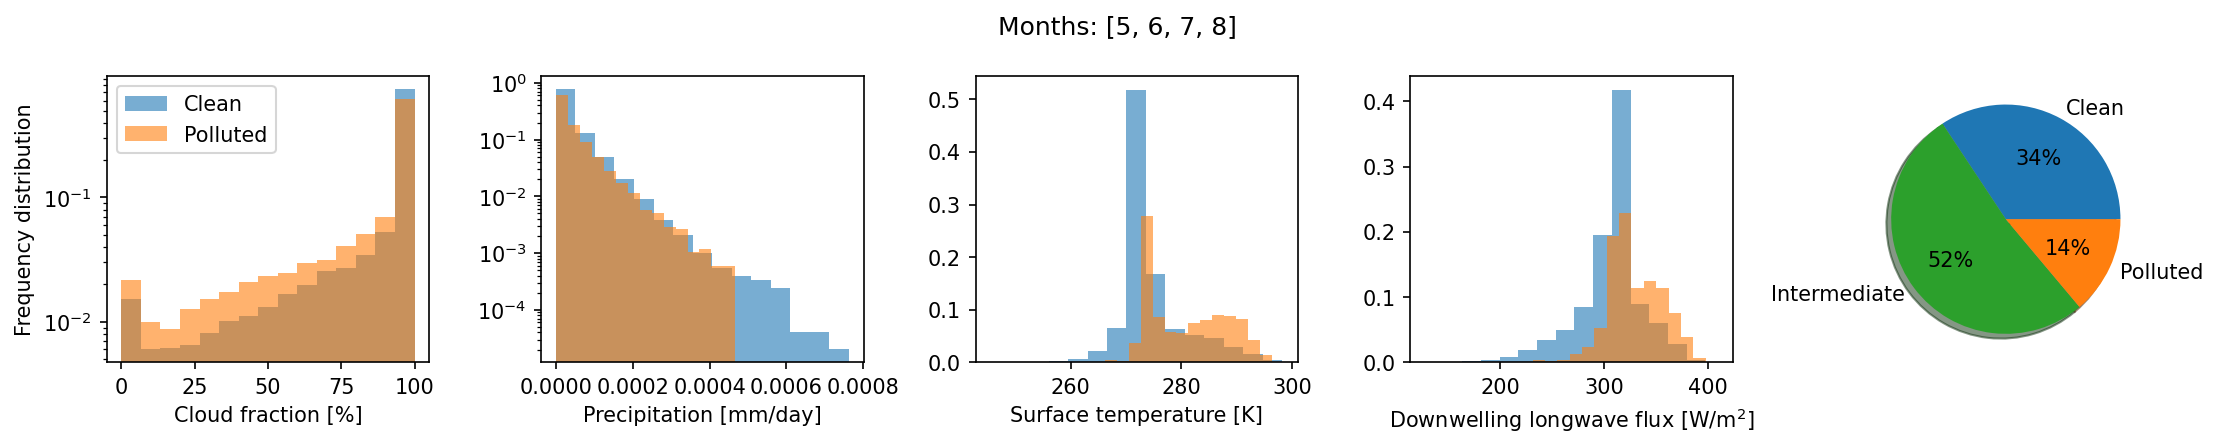

In [86]:
flat_vars = ['clt','pr','tas','rlds']
seasons = [[11,12,1,2],[5,6,7,8]]
fun.plot_hist(flat_vars,seasons, arc_plotting_vars, arc_aod_ar)

Discuss arctic

Plot seasonal Antarctic

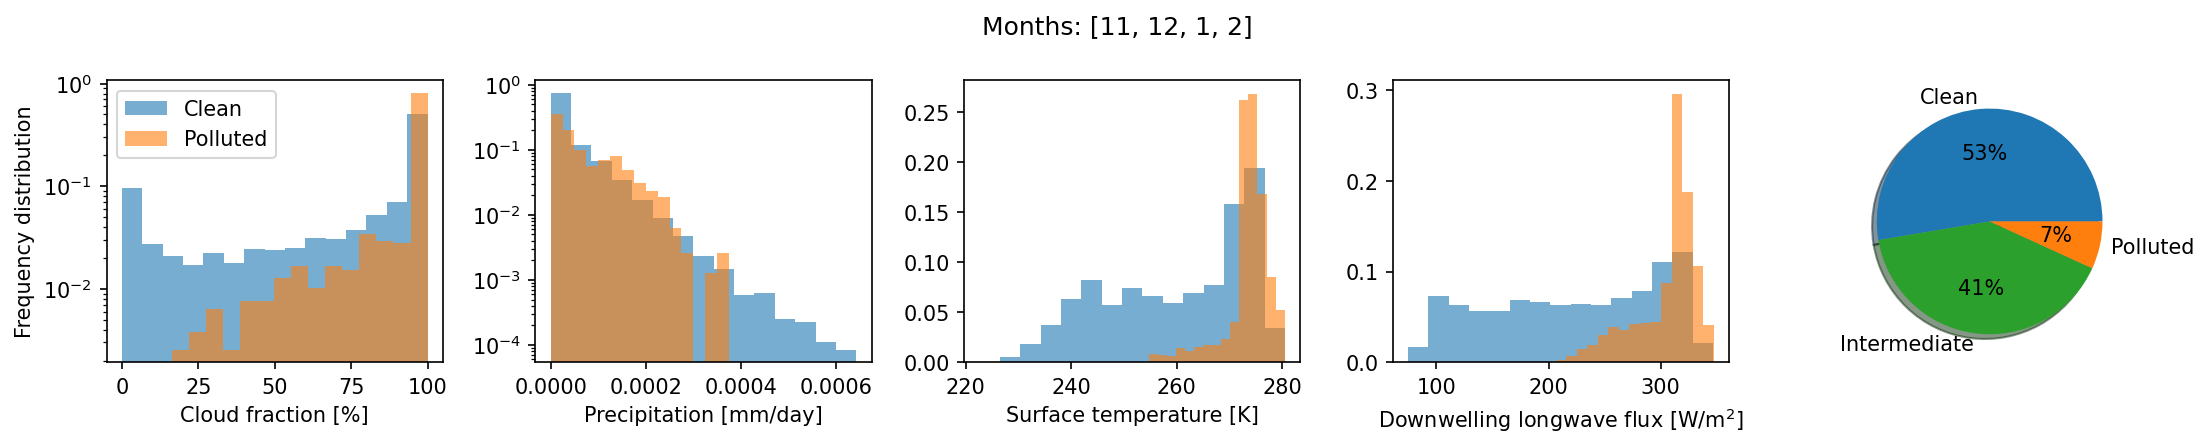

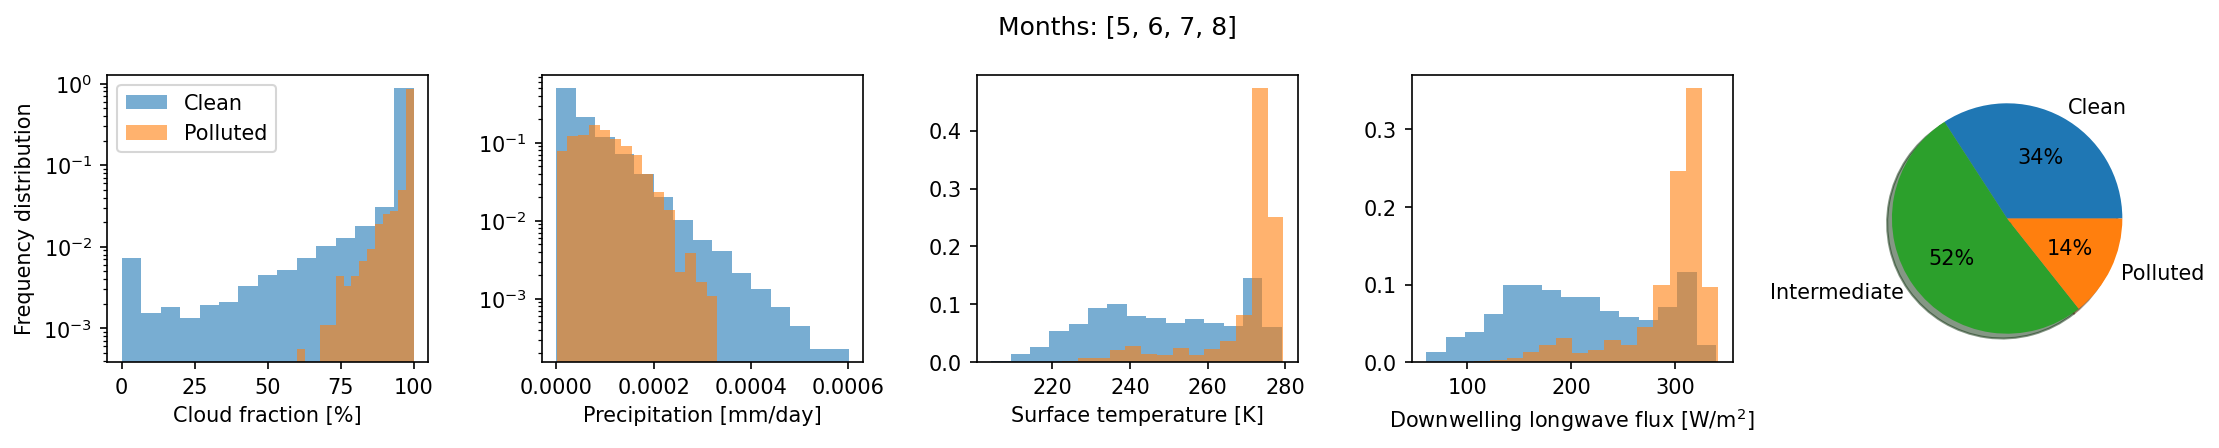

In [85]:
fun.plot_hist(flat_vars,seasons, ant_plotting_vars, ant_aod_ar)

Discuss Antarctic

Discuss
-AR detection (supplements)
-AOD vs vertically resolved aerosol parameter (Where is pollution picked up, does aod really reflect what is carried with the AR, etc)
-should compare high aod and low aod areas without applying AR mask, to see if it is just a correlation with aod or also ivt/AR

## Summary and conclusions

## References

## Supplementary material

Did not have time for this sorry, it is coming!
- Comparison to Jonathans product, discussion and q threshold, maps for comparison